In [1]:

import os
import skimage as ski
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

from skimage import exposure, restoration, filters, feature, morphology, util

def show_grid(images, transform_fn, title_prefix="", cmap="gray", nrows=6, ncols=5, figsize=(12, 8)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, ax in enumerate(axes):
        if idx < len(images):
            out = transform_fn(images[idx])
            ax.imshow(out, cmap=cmap)
            ax.set_title(f"{title_prefix}{idx}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

images = []
for i in range(25):
    image = ski.io.imread(f"{os.getcwd()}/../images/{i}.png")
    images.append(image)

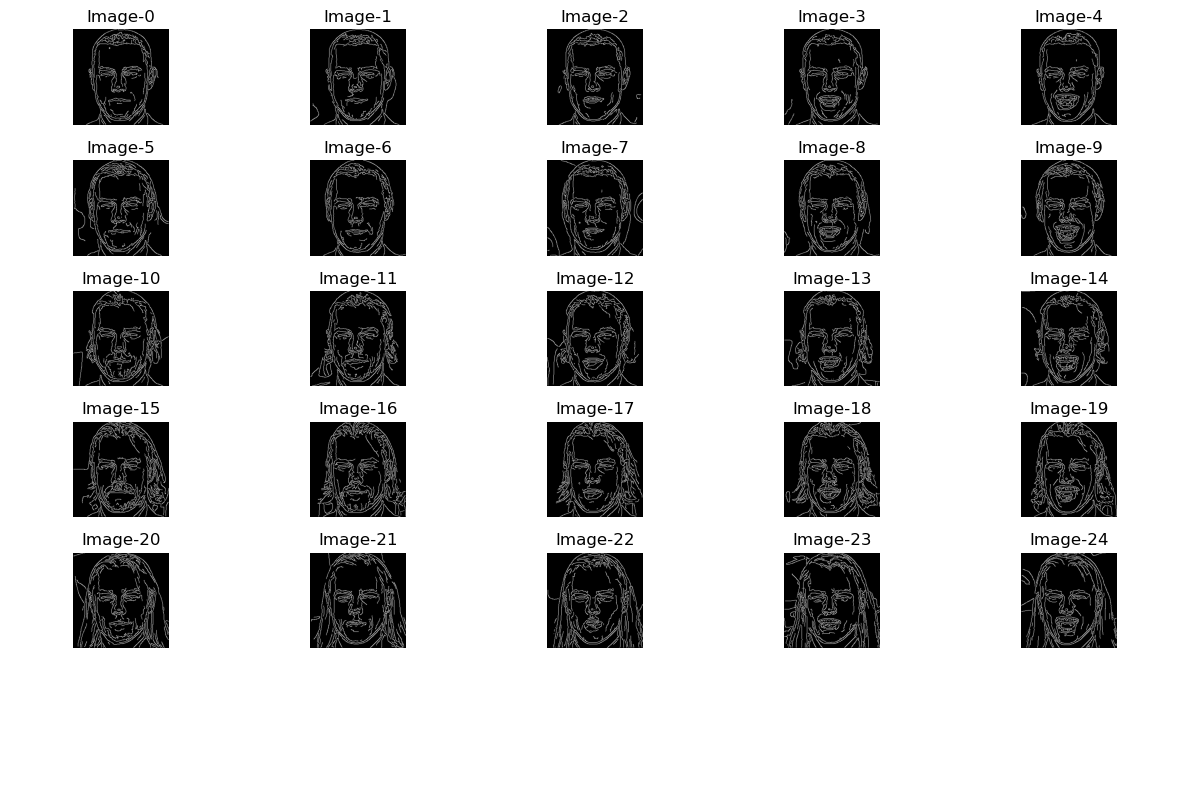

In [5]:

# 6 x 5
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        edges = ski.feature.canny(image)


        ax.imshow(edges, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

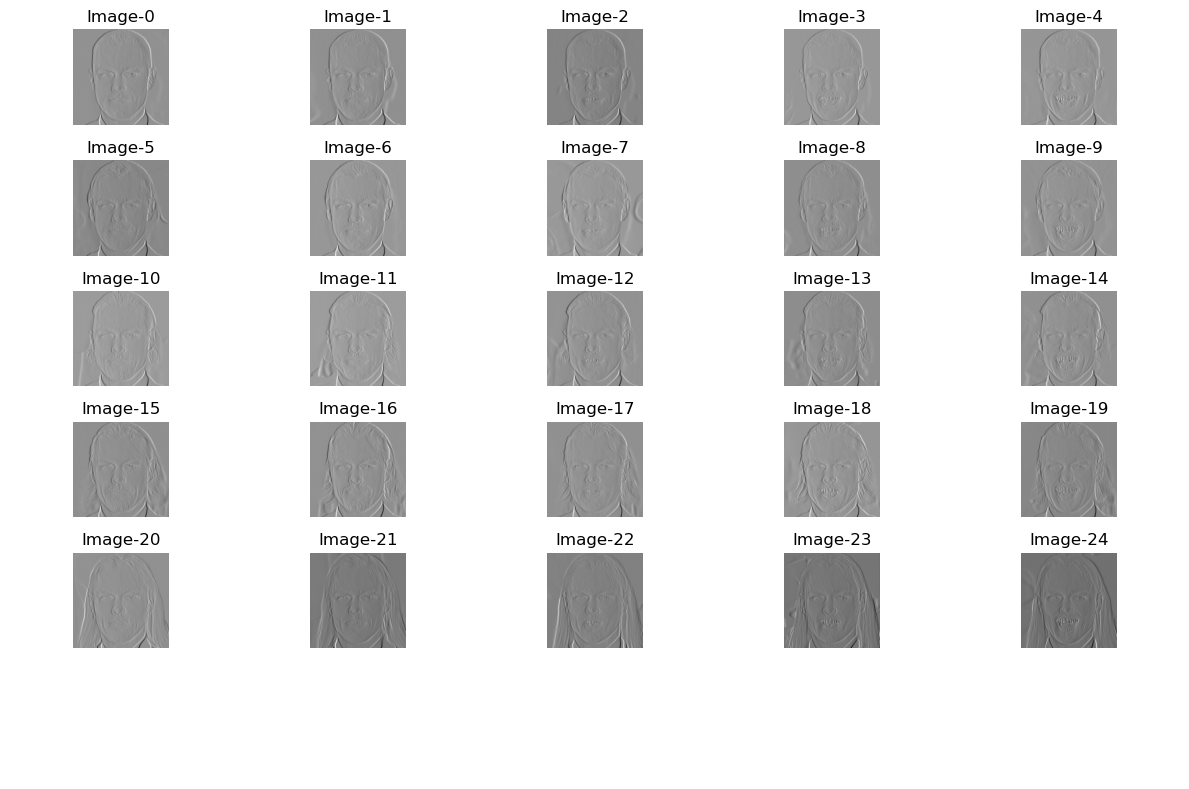

In [6]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        edges = ndimage.prewitt(image)

        ax.imshow(edges, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

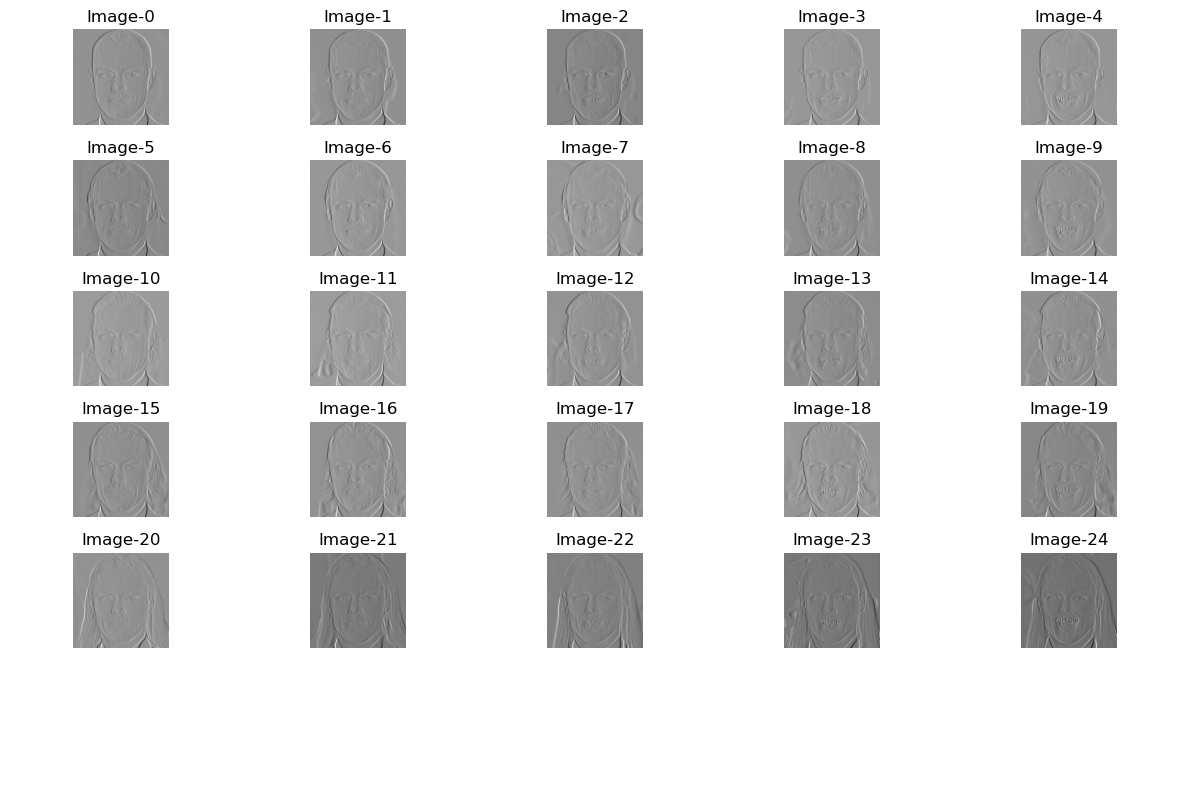

In [7]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ndimage.sobel(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

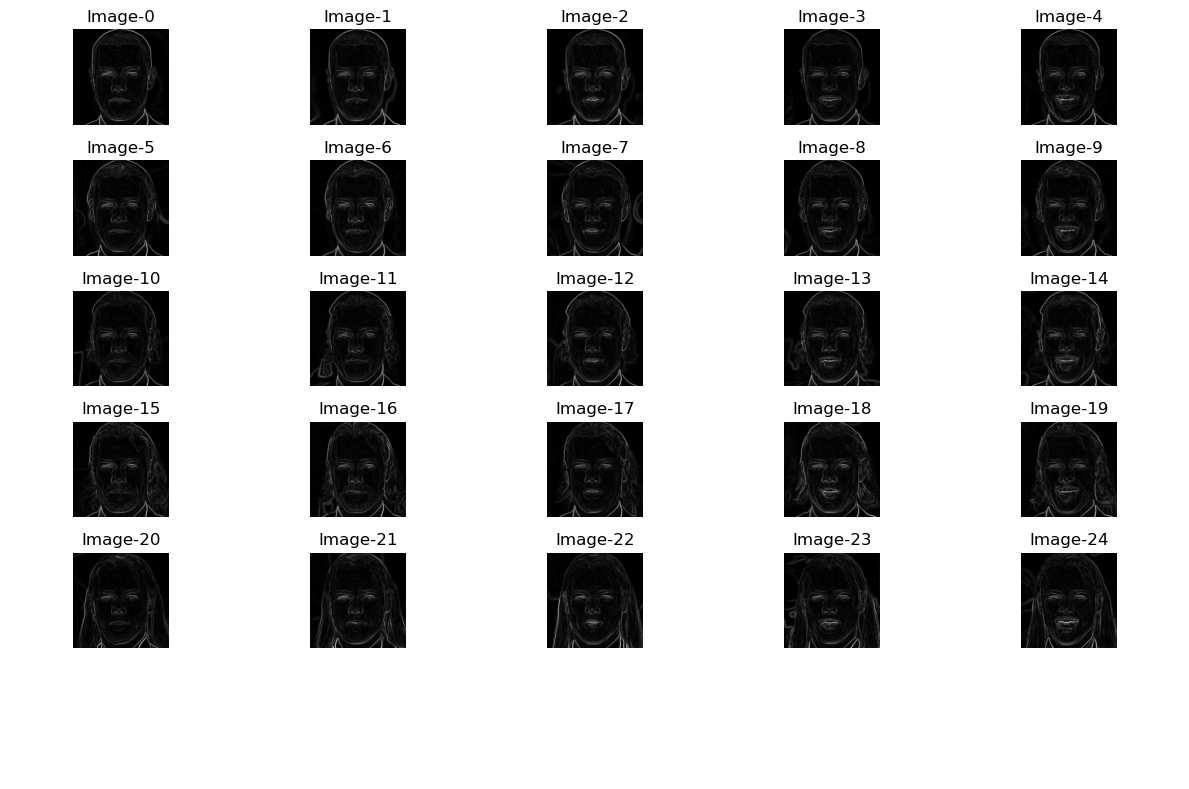

In [8]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ski.filters.sobel(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()



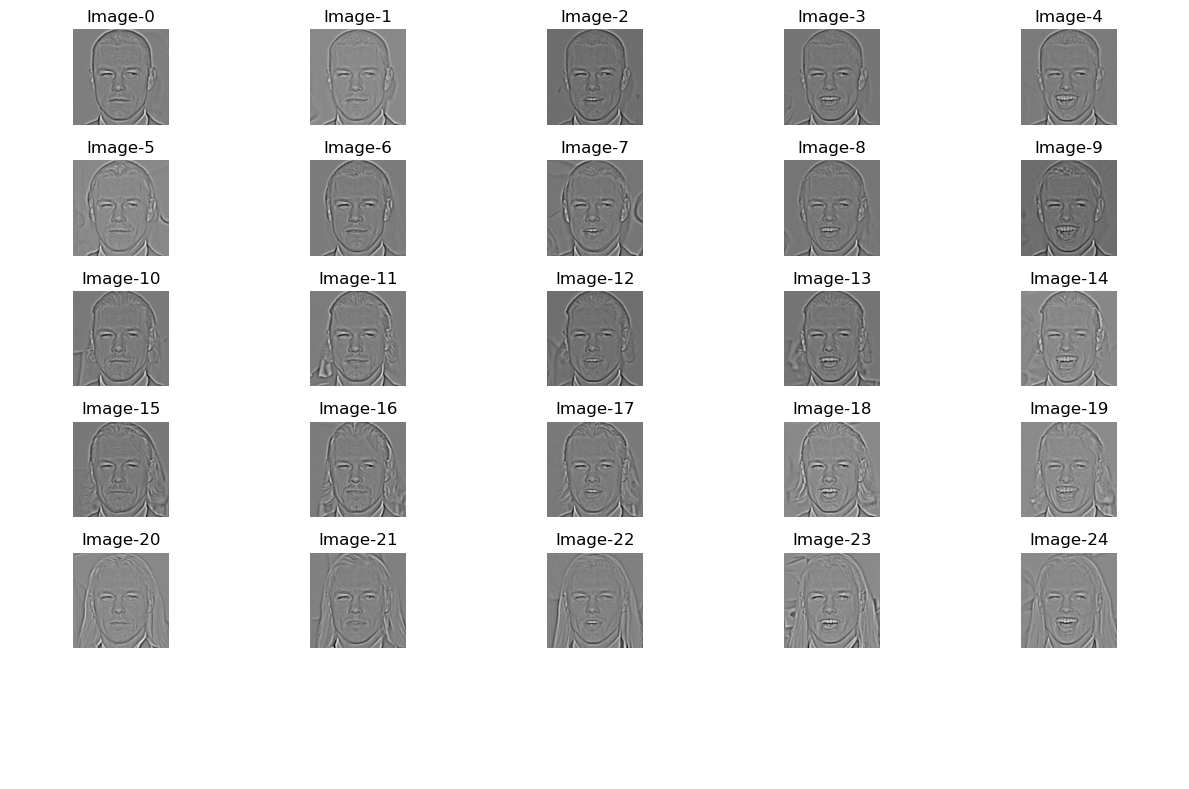

In [9]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ski.filters.difference_of_gaussians(image, low_sigma=1.5)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

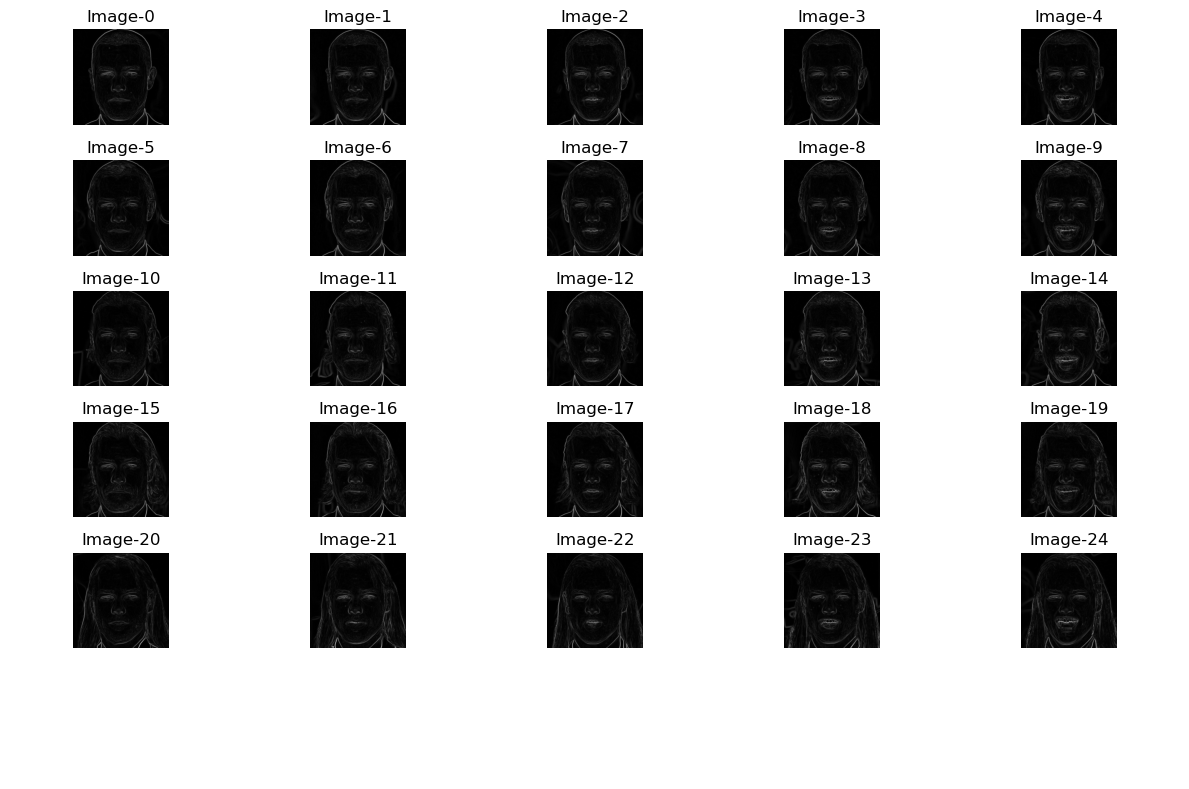

In [10]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ski.filters.roberts(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

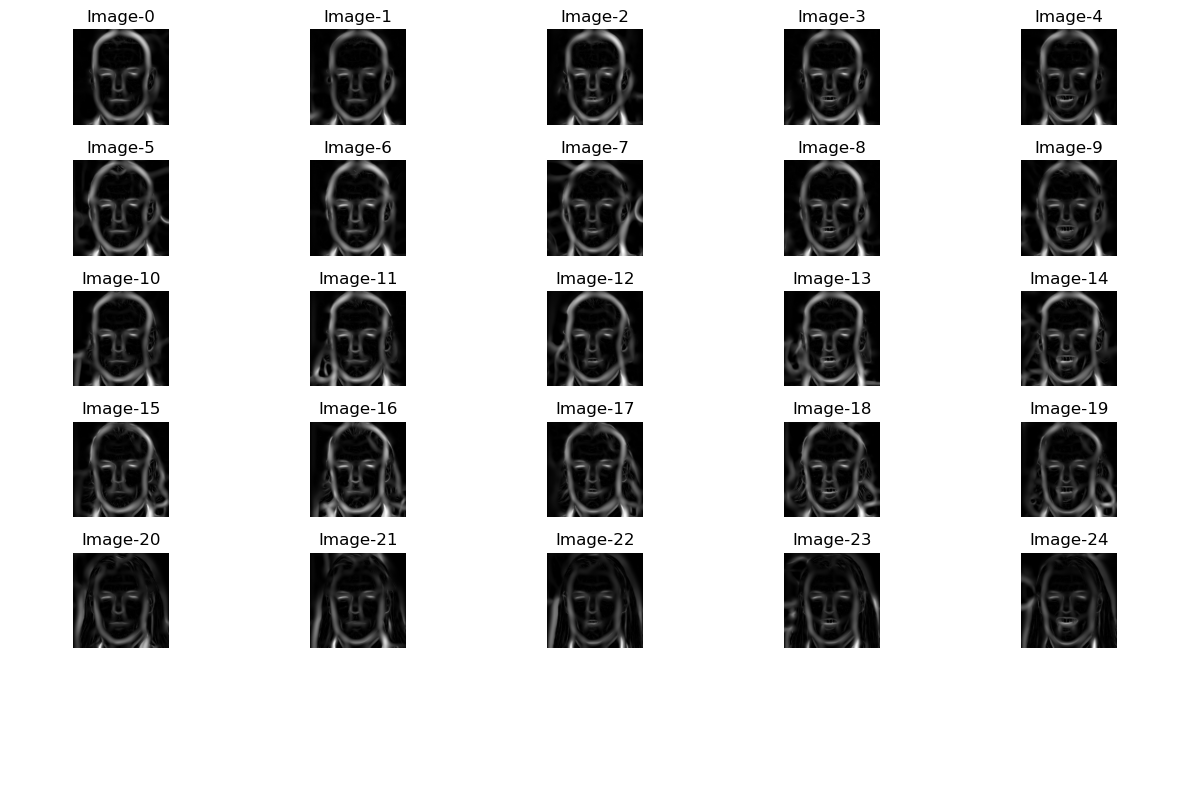

In [11]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ski.filters.sato(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

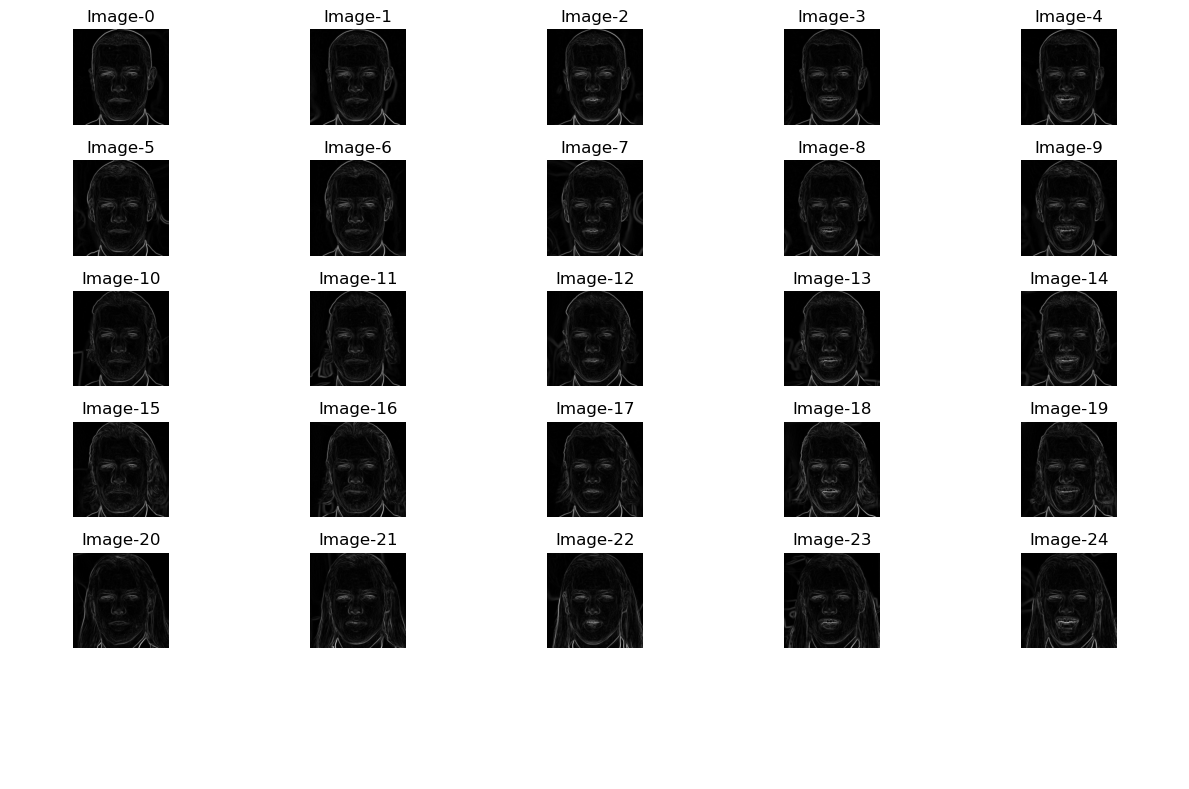

In [13]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = ski.color.rgb2gray(image)
        image = ski.filters.scharr(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()

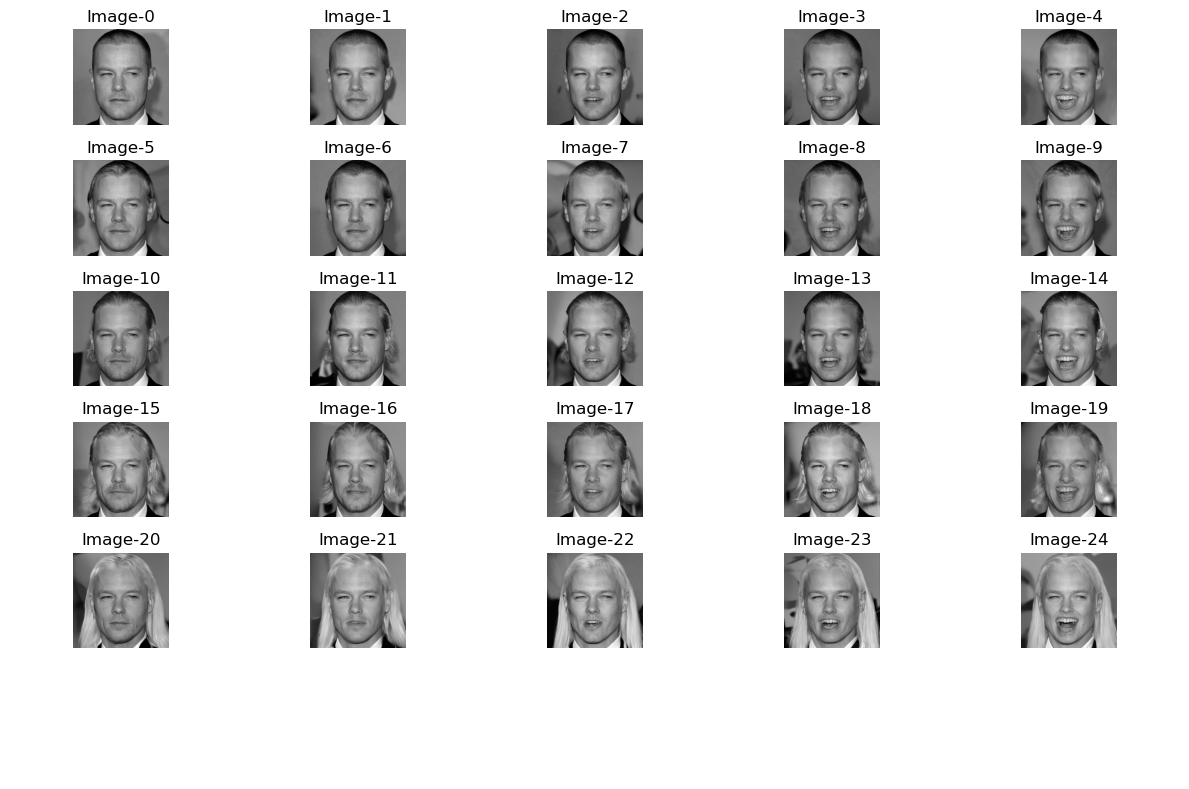

In [14]:
fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):

        image = images[idx]
        image = sfrom2gray(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Image-{idx}")
    ax.axis('off')
plt.tight_layout()
plt.show()




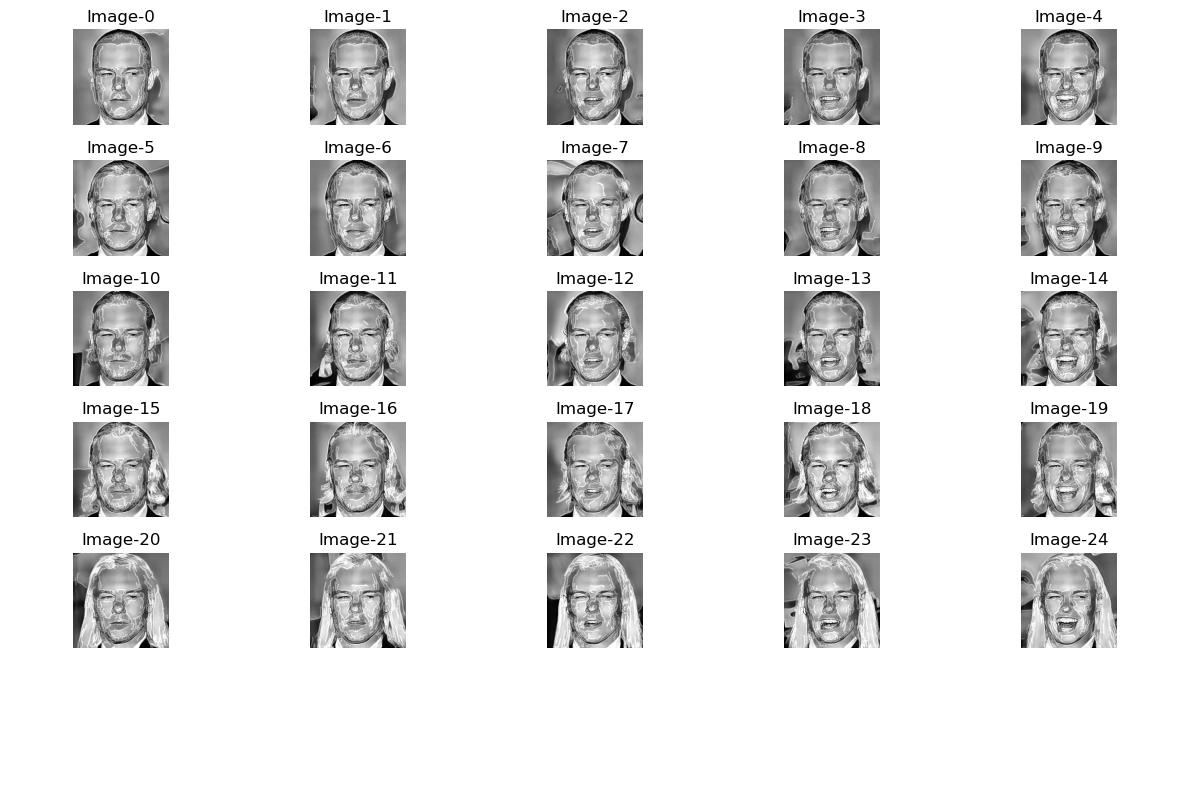

In [15]:

import numpy as np
import skimage as ski
from skimage import exposure, restoration, filters, feature, morphology, util

def enhance_general_features(img_rgb,
                             denoise_strength=0.08,
                             clahe_clip=0.01,
                             unsharp_radius=1.2,
                             unsharp_amount=1.2,
                             edge_sigma=1.2,
                             edge_alpha=0.25):
    gray = ski.color.rgb2gray(img_rgb)
    gray = util.img_as_float(gray)
    den = restoration.denoise_bilateral(
        gray,
        sigma_color=denoise_strength,
        sigma_spatial=3,
        channel_axis=None
    )

    lc = exposure.equalize_adapthist(den, clip_limit=clahe_clip)

    enhanced = filters.unsharp_mask(lc, radius=unsharp_radius, amount=unsharp_amount)
    enhanced = np.clip(enhanced, 0, 1)

    edges = feature.canny(enhanced, sigma=edge_sigma)
    edges = morphology.binary_dilation(edges, morphology.disk(1))
    edges_overlay = enhanced.copy()
    edges_overlay[edges] = np.clip(edges_overlay[edges] + edge_alpha, 0, 1)

    return enhanced, edges_overlay, edges.astype(float)

def normalize_illumination(gray, sigma=20):
    background = filters.gaussian(gray, sigma=sigma)
    norm = gray - background
    norm = (norm - norm.min()) / (norm.max() - norm.min() + 1e-8)
    return norm

fig, axes = plt.subplots(6, 5, figsize=(12, 8))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < len(images):
        image = normalize_illumination(images[idx])
        enhanced, overlay, edges_only = enhance_general_features(image)
        ax.imshow(overlay, cmap="gray")   # <- try enhanced vs overlay
        ax.set_title(f"Image-{idx}")
    ax.axis("off")

plt.tight_layout()
plt.show()






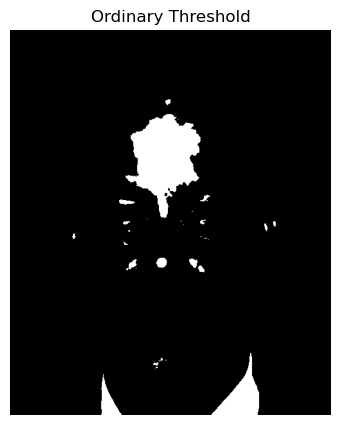

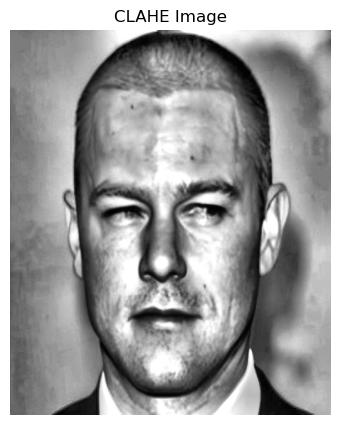

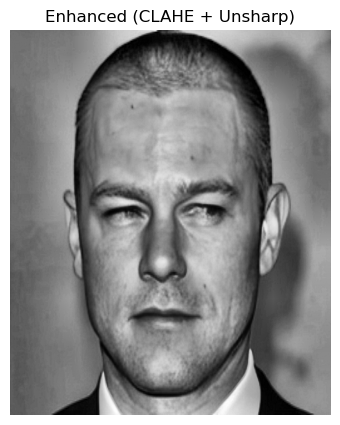

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    plt.figure(figsize=(5, 5))
    if image.ndim == 2:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

image_path = "./images/0.png"
image = images[0]
if image is None:
    raise FileNotFoundError(f"Could not read image at {image_path}")

image_resized = cv2.resize(image, (500, 600))
image_bw = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8, 8))
clahe_img = clahe.apply(image_bw)
clahe_img = cv2.add(clahe_img, 30)

_, threshold_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

display_image("Ordinary Threshold", threshold_img)
display_image("CLAHE Image", clahe_img)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
lc = clahe.apply(image_bw)
blur = cv2.GaussianBlur(lc, (0, 0), sigmaX=1.2)
enhanced = cv2.addWeighted(lc, 1.6, blur, -0.6, 0)

display_image("Enhanced (CLAHE + Unsharp)", enhanced)





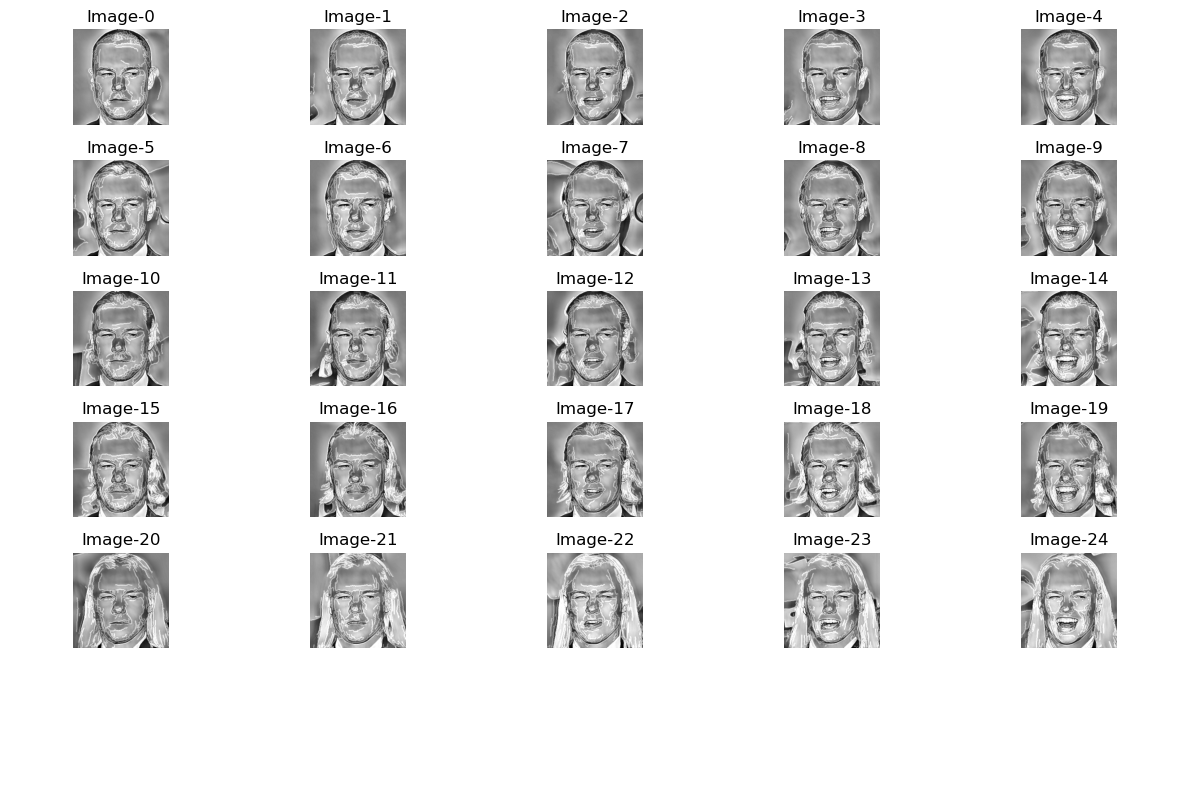

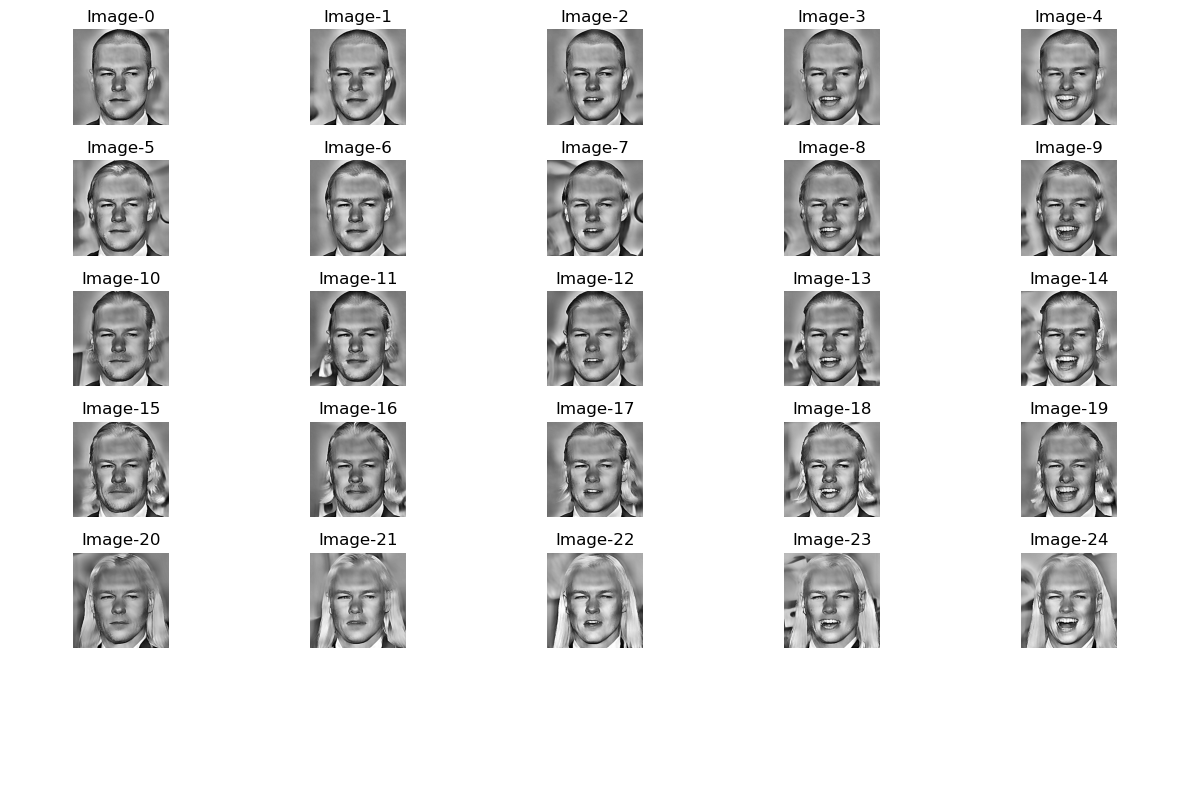

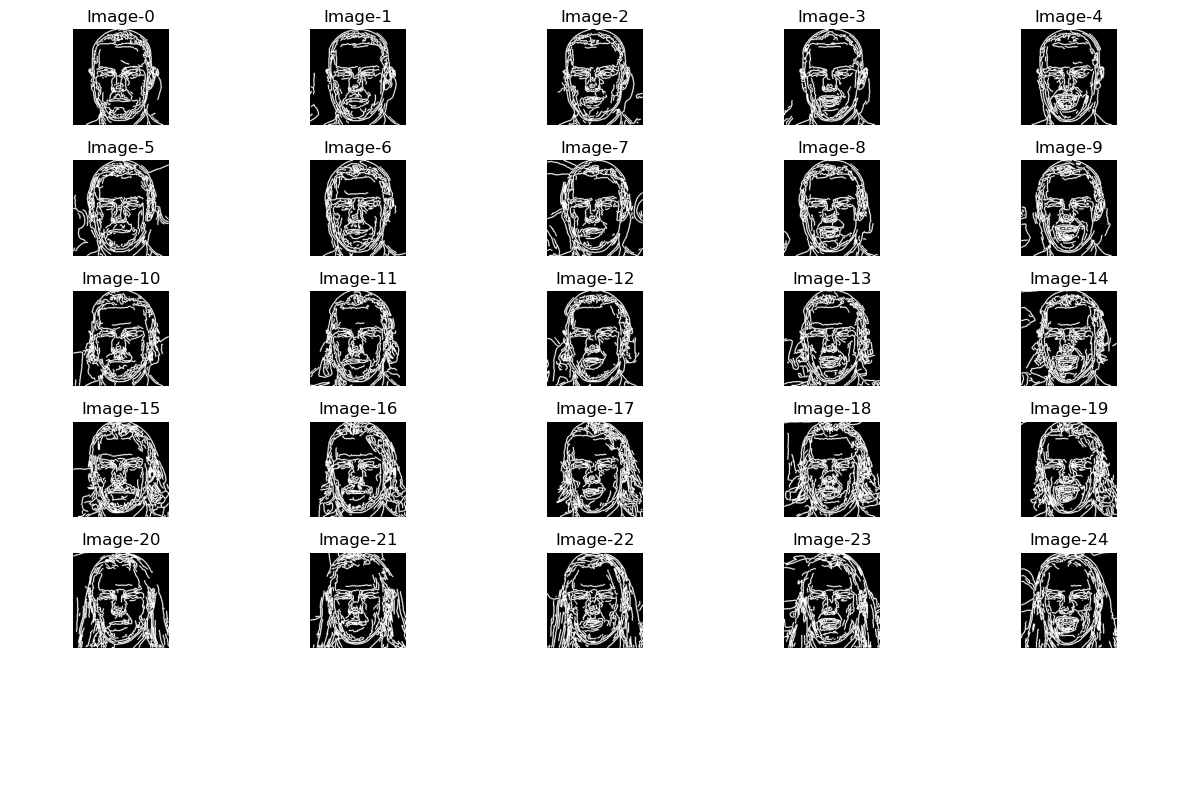

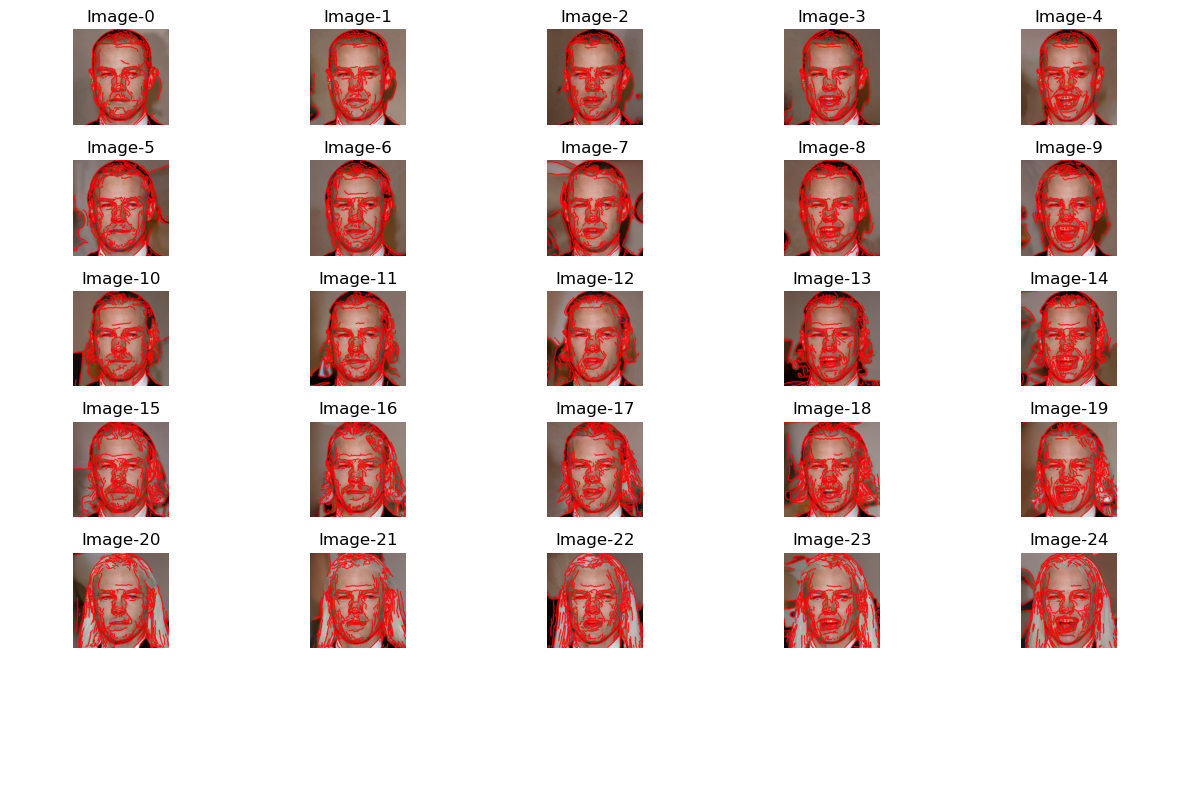

In [2]:
def normalize_illumination_gray(gray, sigma=20):
    bg = filters.gaussian(gray, sigma=sigma)
    norm = gray - bg
    norm = (norm - norm.min()) / (norm.max() - norm.min() + 1e-8)
    return norm

def enhance_general_features(img_rgb,
                             denoise_strength=0.08,
                             clahe_clip=0.01,
                             unsharp_radius=1.2,
                             unsharp_amount=1.2,
                             edge_sigma=1.2,
                             edge_alpha=0.25,
                             illum_sigma=20,
                             do_illum_norm=True,
                             return_mode="overlay"):
    gray = ski.color.rgb2gray(img_rgb)
    gray = util.img_as_float(gray)

    if do_illum_norm:
        gray = normalize_illumination_gray(gray, sigma=illum_sigma)

    den = restoration.denoise_bilateral(
        gray,
        sigma_color=denoise_strength,
        sigma_spatial=3,
        channel_axis=None
    )

    lc = exposure.equalize_adapthist(den, clip_limit=clahe_clip)
    enhanced = filters.unsharp_mask(lc, radius=unsharp_radius, amount=unsharp_amount)
    enhanced = np.clip(enhanced, 0, 1)

    edges = feature.canny(enhanced, sigma=edge_sigma)
    edges = morphology.binary_dilation(edges, morphology.disk(1))

    if return_mode == "edges":
        return edges.astype(float)

    if return_mode == "enhanced":
        return enhanced

    overlay = enhanced.copy()
    overlay[edges] = np.clip(overlay[edges] + edge_alpha, 0, 1)
    return overlay


def overlay_edges_on_rgb(img_rgb,
                         edge_color=(1.0, 0.0, 0.0), 
                         edge_alpha=0.9,
                         **kwargs):
    edges = enhance_general_features(
        img_rgb,
        return_mode="edges",
        **kwargs
    ).astype(bool)

    rgb = util.img_as_float(img_rgb).copy()

    for c in range(3):
        rgb[..., c][edges] = (
            (1 - edge_alpha) * rgb[..., c][edges]
            + edge_alpha * edge_color[c]
        )

    return np.clip(rgb, 0, 1)


show_grid(
    images,
    transform_fn=lambda im: enhance_general_features(im, return_mode="overlay"),
    title_prefix="Image-"
)

show_grid(
    images,
    transform_fn=lambda im: enhance_general_features(im, return_mode="enhanced"),
    title_prefix="Image-"
)

show_grid(
    images,
    transform_fn=lambda im: enhance_general_features(im, return_mode="edges"),
    title_prefix="Image-"
)

show_grid(
    images,
    transform_fn=lambda im: overlay_edges_on_rgb(im),
    title_prefix="Image-"
)